<a href="https://colab.research.google.com/github/Kitiksha1000/Case-Study-12--Ensuring-QA-Measures-in-Credit-Risk-Assessment/blob/main/PAKDD_EDA__Case_study_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASE STUDY-12**: Ensuring Accuracy and Fairness: A Case Study on Quality Assurance in Predictive Analytics for Credit Risk Assessment



## Dataset selection


To address the challenges highlighted in the case study—data quality issues, overfitting, and fairness concerns—I selected three diverse and well-regarded credit risk datasets: PAKDD 2009, Give Me Some Credit (GMSC), and Home Credit Default Risk. These datasets were chosen based on their complementary characteristics, real-world relevance, and suitability for quality assurance (QA) implementation.

**1.  PAKDD 2010**

I began with the PAKDD 2010 dataset because it strikes a balance between structure and complexity. It contains temporal data, labeled loan outcomes, and demographic features, making it ideal for building a baseline predictive model. Importantly, the dataset reflects real-world data issues such as missing values, encoded categoricals, and time-based shifts, which align closely with the case study’s focus on QA and drift detection. Starting with PAKDD enabled me to prototype a complete end-to-end QA pipeline—from preprocessing to fairness auditing.

**2.  Give Me Some Credit (GMSC)**

The GMSC dataset was chosen as a follow-up due to its simplicity and clean numeric structure, allowing for quick model deployment and testing of generalization. It helps validate whether the QA procedures and model built on PAKDD can transfer to a different but related dataset. Though less complex, GMSC provides a useful benchmark for overfitting detection and baseline QA.

**3.  Home Credit**

Finally, I plan to use the Home Credit dataset, which is the most modern and complex among the three. With its extensive feature set and multiple related tables, it presents a realistic challenge for production-level deployment. This dataset is especially useful for stress-testing the QA pipeline, applying fairness checks on richer demographic variables, and simulating real-time monitoring and model drift scenarios.

## Starting off with PAKDD 2009 dataset.


## Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

## Importing the dataset


In [ ]:
'''try:
    df_test = pd.read_csv("/content/PAKDD2010_Prediction_Data.txt", sep='\t', header=None, encoding='latin-1')
    print("File read successfully with latin-1 encoding.")
except UnicodeDecodeError:
    print("latin-1 encoding failed. Trying another encoding if necessary, or inspect the file.")
    # If latin-1 also fails, you might try other encodings like 'ISO-8859-1'
    # or use a tool like 'chardet' to guess the encoding:
    # !pip install chardet
    # import chardet
    # with open("/content/PAKDD2010_Modeling_Data.txt", 'rb') as f:
    #     result = chardet.detect(f.read())
    #     print(result['encoding'])
    # Then use the detected encoding in pd.read_csv

df_test.shape'''

File read successfully with latin-1 encoding.


(20000, 53)

In [ ]:
df=pd.read_csv('/content/PAKDD_Modelling_data.csv')
df.head()

<ipython-input-9-3552127483>:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/PAKDD_Modelling_data.csv')


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


In [ ]:
df.shape

(50000, 54)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NACIONALITY                     

### Replacing the dataframe with column labels

In [ ]:
'''column_names = [
    "ID_CLIENT", "CLERK_TYPE", "PAYMENT_DAY", "APPLICATION_SUBMISSION_TYPE", "QUANT_ADDITIONAL_CARDS",
    "POSTAL_ADDRESS_TYPE", "SEX", "MARITAL_STATUS", "QUANT_DEPENDANTS", "EDUCATION_LEVEL",
    "STATE_OF_BIRTH", "CITY_OF_BIRTH", "NACIONALITY", "RESIDENCIAL_STATE", "RESIDENCIAL_CITY",
    "RESIDENCIAL_BOROUGH", "FLAG_RESIDENCIAL_PHONE", "RESIDENCIAL_PHONE_AREA_CODE", "RESIDENCE_TYPE",
    "MONTHS_IN_RESIDENCE", "FLAG_MOBILE_PHONE", "FLAG_EMAIL", "PERSONAL_MONTHLY_INCOME", "OTHER_INCOMES",
    "FLAG_VISA", "FLAG_MASTERCARD", "FLAG_DINERS", "FLAG_AMERICAN_EXPRESS", "FLAG_OTHER_CARDS",
    "QUANT_BANKING_ACCOUNTS", "QUANT_SPECIAL_BANKING_ACCOUNTS", "PERSONAL_ASSETS_VALUE", "QUANT_CARS",
    "COMPANY", "PROFESSIONAL_STATE", "PROFESSIONAL_CITY", "PROFESSIONAL_BOROUGH", "FLAG_PROFESSIONAL_PHONE",
    "PROFESSIONAL_PHONE_AREA_CODE", "MONTHS_IN_THE_JOB", "PROFESSION_CODE", "OCCUPATION_TYPE",
    "MATE_PROFESSION_CODE", "MATE_EDUCATION_LEVEL", "FLAG_HOME_ADDRESS_DOCUMENT", "FLAG_RG", "FLAG_CPF",
    "FLAG_INCOME_PROOF", "PRODUCT", "FLAG_ACSP_RECORD", "AGE", "RESIDENCIAL_ZIP_3", "PROFESSIONAL_ZIP_3",
    "TARGET_LABEL_BAD"
]'''

In [ ]:
df.shape

(50000, 54)

In [ ]:
df.to_csv('PAKDD_Modelling_data.csv', index=False)

## Basic exploration: Missing values, column info, datatypes etc.

In [ ]:
df.describe()

,ID_CLIENT,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,TARGET_LABEL_BAD
count,50000.000000,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,50000.0,50000.000000,48651.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,42244.000000,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.00000,50000.000000
mean,25000.500000,12.869920,0.0,1.006540,2.14840,0.650520,0.0,0.961600,1.252225,9.727149,0.802280,886.678437,35.434760,0.111440,0.097460,0.001320,0.001740,0.002040,0.357840,0.357840,2.322372e+03,0.336140,0.009320,8.061784,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,43.24852,0.260820
std,14433.901067,6.608385,0.0,0.080606,1.32285,1.193655,0.0,0.202105,0.867833,10.668841,0.398284,7846.959327,891.515142,0.314679,0.296586,0.036308,0.041677,0.045121,0.479953,0.479953,4.235798e+04,0.472392,0.383453,3.220104,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,14.98905,0.439086
min,1.000000,1.000000,0.0,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.00000,0.000000
25%,12500.750000,10.000000,0.0,1.000000,1.00000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.00000,0.000000
50%,25000.500000,10.000000,0.0,1.000000,2.00000,0.000000,0.0,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.00000,0.000000
75%,37500.250000,15.000000,0.0,1.000000,2.00000,1.000000,0.0,1.000000,1.000000,15.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,9.000000,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.00000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.00000,53.000000,0.0,2.000000,5.000000,228.000000,1.000000,959000.000000,194344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000e+06,1.000000,35.000000,18.000000,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NACIONALITY                     

In [ ]:
df.isnull().sum()

,0
ID_CLIENT,0
CLERK_TYPE,0
PAYMENT_DAY,0
APPLICATION_SUBMISSION_TYPE,0
QUANT_ADDITIONAL_CARDS,0
POSTAL_ADDRESS_TYPE,0
SEX,0
MARITAL_STATUS,0
QUANT_DEPENDANTS,0
EDUCATION_LEVEL,0




> Features with more than 60% missing values-` MATE_EDUCATION_LEVEL`, `MATE_PROFESSION_CODE`,` PROFESSIONAL_BOROUGH`, `PROFESSIONAL_CITY`




### Distribution of target label

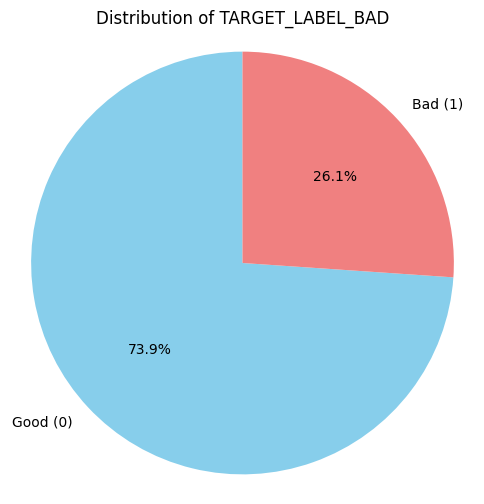

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each target label
target_counts = df['TARGET_LABEL_BAD'].value_counts()
custom_labels = ['Good (0)', 'Bad (1)']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=custom_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of TARGET_LABEL_BAD')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



> The Target label is imbalanced with 3:1 of Good:Bad. Will need to balance the dataset in future.



### Dropping columns with only one unique value; serving no predictive power and storing as df1.

In [ ]:
constant_features = [col for col in df.columns if df[col].nunique(dropna=False) == 1]

print("Columns with only one unique value:")
print(constant_features)


Columns with only one unique value:
['CLERK_TYPE', 'QUANT_ADDITIONAL_CARDS', 'EDUCATION_LEVEL', 'FLAG_MOBILE_PHONE', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD']


In [ ]:
df1=df.drop(columns=['CLERK_TYPE', 'QUANT_ADDITIONAL_CARDS', 'EDUCATION_LEVEL', 'FLAG_MOBILE_PHONE', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD'])
df1.shape

(50000, 45)

In [ ]:
28884/50000


0.57768

In [ ]:
df['POSTAL_ADDRESS_TYPE'].value_counts() # 1->Home Address, 2->Other Address

,count
POSTAL_ADDRESS_TYPE,
1,49673
2,327






> 1->Home Address, 2->Other Address






In [ ]:
df['SEX'].value_counts()

,count
SEX,
F,30805
M,19130
N,48
,17


### Dropping columns with more than 60% missing values and storing as df2

In [ ]:
df2=df1.drop(columns=['MATE_EDUCATION_LEVEL', 'MATE_PROFESSION_CODE', 'PROFESSIONAL_BOROUGH', 'PROFESSIONAL_CITY','ID_CLIENT'])
df2.shape

(50000, 40)



## Separating numerical and categorical features



In [ ]:
numerical_df = df2.select_dtypes(include=['int64', 'float64'])
categorical_df = df2.select_dtypes(exclude=['int64', 'float64'])

## 1. Exploring the numerical df

In [ ]:
numerical_df.shape

(50000, 25)

In [ ]:
numerical_df.describe()

,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,48651.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,42244.000000,42687.000000,50000.000000,50000.00000,50000.000000
mean,12.869920,1.006540,2.14840,0.650520,0.961600,1.252225,9.727149,0.802280,886.678437,35.434760,0.111440,0.097460,0.001320,0.001740,0.002040,0.357840,0.357840,2.322372e+03,0.336140,0.009320,8.061784,2.484316,1.275700,43.24852,0.260820
std,6.608385,0.080606,1.32285,1.193655,0.202105,0.867833,10.668841,0.398284,7846.959327,891.515142,0.314679,0.296586,0.036308,0.041677,0.045121,0.479953,0.479953,4.235798e+04,0.472392,0.383453,3.220104,1.532261,0.988286,14.98905,0.439086
min,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,6.00000,0.000000
25%,10.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,1.000000,1.000000,31.00000,0.000000
50%,10.000000,1.000000,2.00000,0.000000,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,2.000000,1.000000,41.00000,0.000000
75%,15.000000,1.000000,2.00000,1.000000,1.000000,1.000000,15.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,9.000000,4.000000,1.000000,53.00000,1.000000
max,25.000000,2.000000,7.00000,53.000000,2.000000,5.000000,228.000000,1.000000,959000.000000,194344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000e+06,1.000000,35.000000,18.000000,5.000000,7.000000,106.00000,1.000000


In [ ]:
numerical_df.isnull().sum()

,0
PAYMENT_DAY,0
POSTAL_ADDRESS_TYPE,0
MARITAL_STATUS,0
QUANT_DEPENDANTS,0
NACIONALITY,0
RESIDENCE_TYPE,1349
MONTHS_IN_RESIDENCE,3777
FLAG_EMAIL,0
PERSONAL_MONTHLY_INCOME,0
OTHER_INCOMES,0




> **Numerical features with missing values**- `RESIDENCE_TYPE, MONTHS_IN_RESIDENCE, PROFESSION_CODE, OCCUPATION_TYPE`





### Barplot

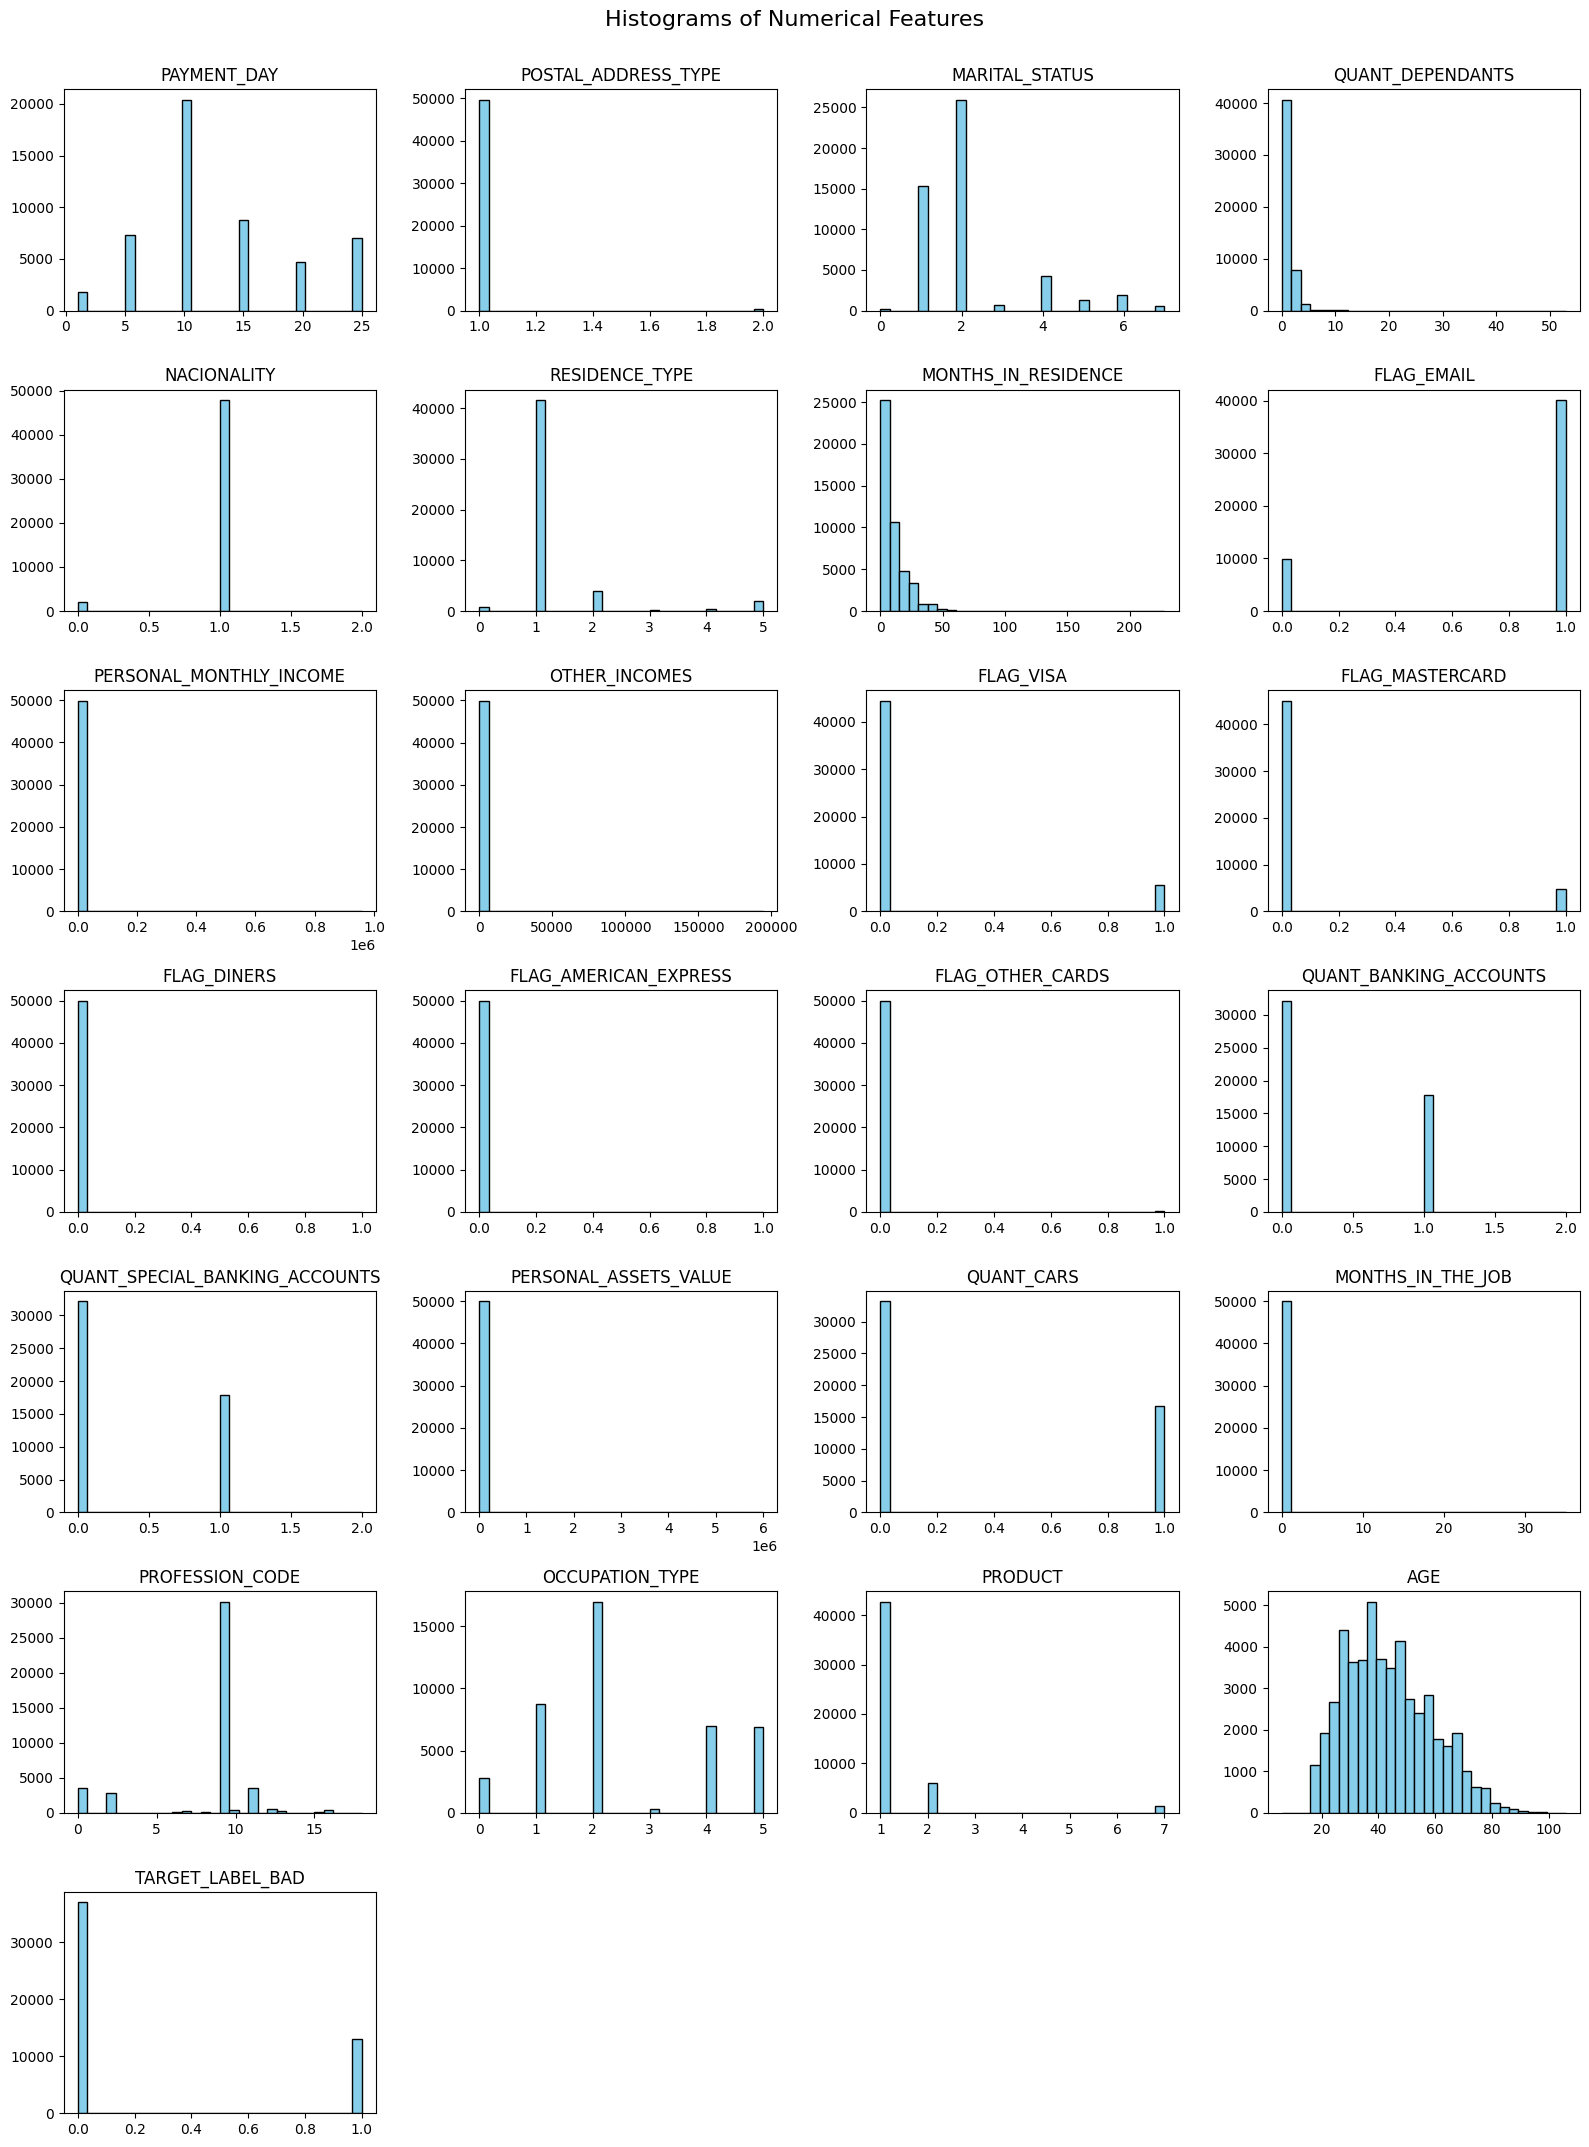

In [ ]:
import matplotlib.pyplot as plt
import math

num_features = numerical_df.shape[1]
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(cols * 4, rows * 3))

for i, column in enumerate(numerical_df.columns, 1):
    plt.subplot(rows, cols, i)
    plt.hist(numerical_df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.tight_layout()

plt.suptitle("Histograms of Numerical Features", fontsize=16, y=1.02)
plt.show()


### Descriptive statistics grouped according to Target label

In [ ]:
# Iterate through each numerical column
for col in numerical_df.columns:
    print(f"\nDescription of {col} grouped by TARGET_LABEL_BAD:")
    description = numerical_df.groupby('TARGET_LABEL_BAD')[col].describe()
    print(description)

    # Compare medians and means
    print(f"\nMedian and Mean comparison for {col}:")
    median_values = numerical_df.groupby('TARGET_LABEL_BAD')[col].median()
    mean_values = numerical_df.groupby('TARGET_LABEL_BAD')[col].mean()
    comparison_df = pd.DataFrame({'Median': median_values, 'Mean': mean_values})
    print(comparison_df)


Description of PAYMENT_DAY grouped by TARGET_LABEL_BAD:
                    count       mean       std  min   25%   50%   75%   max
TARGET_LABEL_BAD                                                           
0                 36959.0  12.592657  6.461931  1.0  10.0  10.0  15.0  25.0
1                 13041.0  13.655701  6.947227  1.0  10.0  10.0  20.0  25.0

Median and Mean comparison for PAYMENT_DAY:
                  Median       Mean
TARGET_LABEL_BAD                   
0                   10.0  12.592657
1                   10.0  13.655701

Description of POSTAL_ADDRESS_TYPE grouped by TARGET_LABEL_BAD:
                    count      mean       std  min  25%  50%  75%  max
TARGET_LABEL_BAD                                                      
0                 36959.0  1.006656  0.081314  1.0  1.0  1.0  1.0  2.0
1                 13041.0  1.006211  0.078569  1.0  1.0  1.0  1.0  2.0

Median and Mean comparison for POSTAL_ADDRESS_TYPE:
                  Median      Mean
TARGET_LABEL_

### Pie chart to find the distribution of target label in each feature

### Exploring highly imbalanced features

In [ ]:
highly_imbalanced_numerical = []

# Loop through numerical features only
for col in numerical_df.columns:
    top_freq_ratio = numerical_df[col].value_counts(normalize=True, dropna=False).values[0]
    if top_freq_ratio > 0.99:
        highly_imbalanced_numerical.append((col, top_freq_ratio))

# Convert to DataFrame
imbalanced_numerical_df = pd.DataFrame(highly_imbalanced_numerical, columns=['Feature', 'Top Category Proportion'])

# Sort (optional)
imbalanced_numerical_df = imbalanced_numerical_df.sort_values(by='Top Category Proportion', ascending=False).reset_index(drop=True)

print(imbalanced_numerical_df)


                 Feature  Top Category Proportion
0            FLAG_DINERS                  0.99868
1      MONTHS_IN_THE_JOB                  0.99848
2  FLAG_AMERICAN_EXPRESS                  0.99826
3       FLAG_OTHER_CARDS                  0.99796
4    POSTAL_ADDRESS_TYPE                  0.99346


In [ ]:
numerical_df['MONTHS_IN_THE_JOB'].value_counts()


,count
MONTHS_IN_THE_JOB,
0,49924
2,18
1,15
3,12
5,6
4,4
6,2
14,2
12,2


In [ ]:
numerical_df['QUANT_BANKING_ACCOUNTS'].value_counts()

,count
QUANT_BANKING_ACCOUNTS,
0,32122
1,17864
2,14


### Separating numerical features based on % variation.

In [ ]:
import pandas as pd

# Initialize bins
bins = {
    '>99%': [],
    '95%-99%': [],
    '90%-95%': [],
    '<90%': []
}

# Analyze each numerical column
for col in numerical_df.columns:
    top_ratio = numerical_df[col].value_counts(normalize=True, dropna=False).values[0]

    if top_ratio > 0.99:
        bins['>99%'].append((col, top_ratio))
    elif 0.95 < top_ratio <= 0.99:
        bins['95%-99%'].append((col, top_ratio))
    elif 0.90 < top_ratio <= 0.95:
        bins['90%-95%'].append((col, top_ratio))
    else:
        bins['<90%'].append((col, top_ratio))

# Convert each bin into a DataFrame for display
summary_table = []
for category, features in bins.items():
    for feature, ratio in features:
        summary_table.append({'Feature': feature, 'Top Value %': round(ratio * 100, 2), 'Category': category})

# Create final summary DataFrame
summary_df = pd.DataFrame(summary_table).sort_values(by='Top Value %', ascending=False).reset_index(drop=True)

# Display summary table
print(summary_df)


                           Feature  Top Value % Category
0                      FLAG_DINERS        99.87     >99%
1                MONTHS_IN_THE_JOB        99.85     >99%
2            FLAG_AMERICAN_EXPRESS        99.83     >99%
3                 FLAG_OTHER_CARDS        99.80     >99%
4              POSTAL_ADDRESS_TYPE        99.35     >99%
5                      NACIONALITY        95.77  95%-99%
6            PERSONAL_ASSETS_VALUE        95.22  95%-99%
7                    OTHER_INCOMES        94.45  90%-95%
8                  FLAG_MASTERCARD        90.25  90%-95%
9                        FLAG_VISA        88.86     <90%
10                         PRODUCT        85.38     <90%
11                  RESIDENCE_TYPE        83.14     <90%
12                      FLAG_EMAIL        80.23     <90%
13                TARGET_LABEL_BAD        73.92     <90%
14                QUANT_DEPENDANTS        67.31     <90%
15                      QUANT_CARS        66.39     <90%
16          QUANT_BANKING_ACCOU

**Observations- numerical features**

1. These features are likely to be dropped since they contain less than 1% variation-  `FLAG_DINERS , FLAG_AMERICAN_EXPRESS, FLAG_OTHER_CARDS , POSTAL_ADDRESS_TYPE`
2.` MONTHS_IN_THE_JOB	`- This features is highly imbalanced, but shouldn't be, needs further investigation.
3.` MARITAL_STATUS`- Encoding not informed, needs further inverstigation
4. `PROFESSION_CODE, OCCUPATION_TYPE`,`RESIDENCE_TYPE, MONTHS_IN_RESIDENCE`- only features with missing values
5. `RESIDENCE_TYPE`- Encoding not informed but likely-

 1- Owned, 2- Mortagage, 3- Rented, 4- Family, 5- Parents.
6.` AGE` is the continuous variable- Tends to follow normal distribution but likely contains outliers
7. `PERSONAL_ASSETS_VALUE`, `OTHER_INCOMES` contains 95% values as 0 which is unlikely, needs further investigation






### Correlation matrix for numerical variables




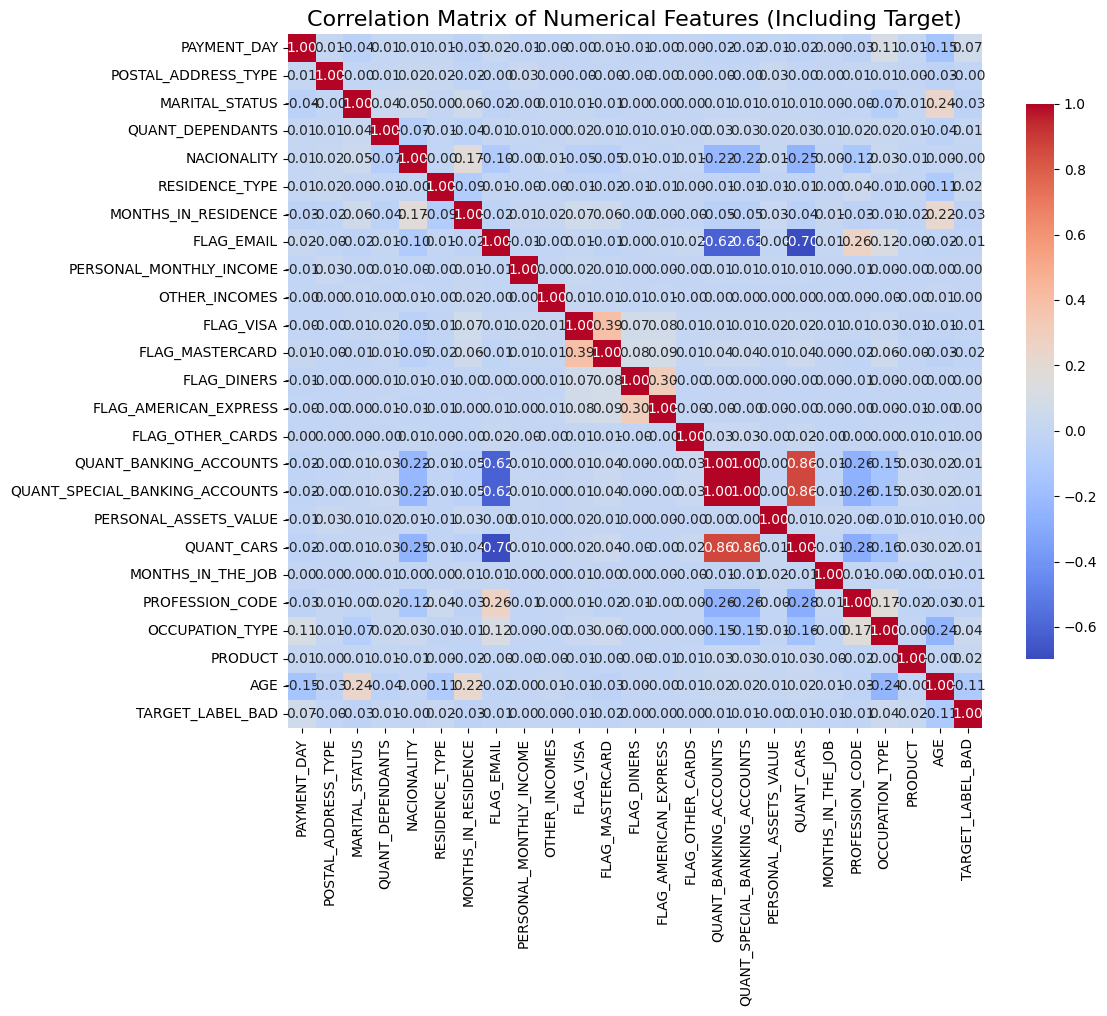

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Numerical Features (Including Target)", fontsize=16)
plt.tight_layout()
plt.show()


**Observations from correlation matrix**

1. Redundant pairs - `QUANT_BANKING_ACCOUNTS, QUANT_SPECIAL_BANKING_ACCOUNTS` ; Correlation=1
2. Likely to be redundant- `QUANT_BANKING_ACCOUNTS`, `QUANT_CARS` and `QUANT_BANKING_ACCOUNTS`,`FLAG_EMAIL`







### Using VIF to further detect multicollinearity

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Drop target and columns with missing values
X = numerical_df.drop(columns=['TARGET_LABEL_BAD'])
X = X.dropna(axis=1)

# Step 2: Add constant for VIF
X_const = add_constant(X)

# Step 3: Compute VIFs
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i + 1) for i in range(len(X.columns))]  # skip constant

# Step 4: Sort and display
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
print(vif_data)


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                           Feature       VIF
0           QUANT_BANKING_ACCOUNTS       inf
1   QUANT_SPECIAL_BANKING_ACCOUNTS       inf
2                       QUANT_CARS  5.071385
3                       FLAG_EMAIL  2.305049
4                      NACIONALITY  1.266455
5                  FLAG_MASTERCARD  1.186306
6                        FLAG_VISA  1.181999
7            FLAG_AMERICAN_EXPRESS  1.107307
8                      FLAG_DINERS  1.106394
9                              AGE  1.088560
10                  MARITAL_STATUS  1.066041
11                     PAYMENT_DAY  1.025044
12                QUANT_DEPENDANTS  1.010708
13                FLAG_OTHER_CARDS  1.005151
14             POSTAL_ADDRESS_TYPE  1.003544
15           PERSONAL_ASSETS_VALUE  1.003000
16                         PRODUCT  1.001962
17         PERSONAL_MONTHLY_INCOME  1.001514
18               MONTHS_IN_THE_JOB  1.000830
19                   OTHER_INCOMES  1.000542




> Hence proved, `QUANT_BANKING_ACCOUNTS` & `QUANT_SPECIAL_BANKING_ACCOUNTS` with **inf VIF**, one of them needs to be removed, `QUANT_CARS` needs to be inspected and the rest are in safe zone with low multicollinearity.




### Exploring continuous features not visualized accurately by barplots

In [ ]:
numerical_df[['PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES','MONTHS_IN_RESIDENCE','PERSONAL_ASSETS_VALUE']].describe()

KeyError: "['QUANT_DEPENDENTS'] not in index"



> ALl the above features have a huge difference between the 75th percentile and max, indicating outliers.



### Outlier Detection

**`PERSONAL_MONTHLY_INCOME,	OTHER_INCOMES,	MONTHS_IN_RESIDENCE, 	PERSONAL_ASSETS_VALUE`**

**1. Barplot capped at 95% to visualize continuous features**

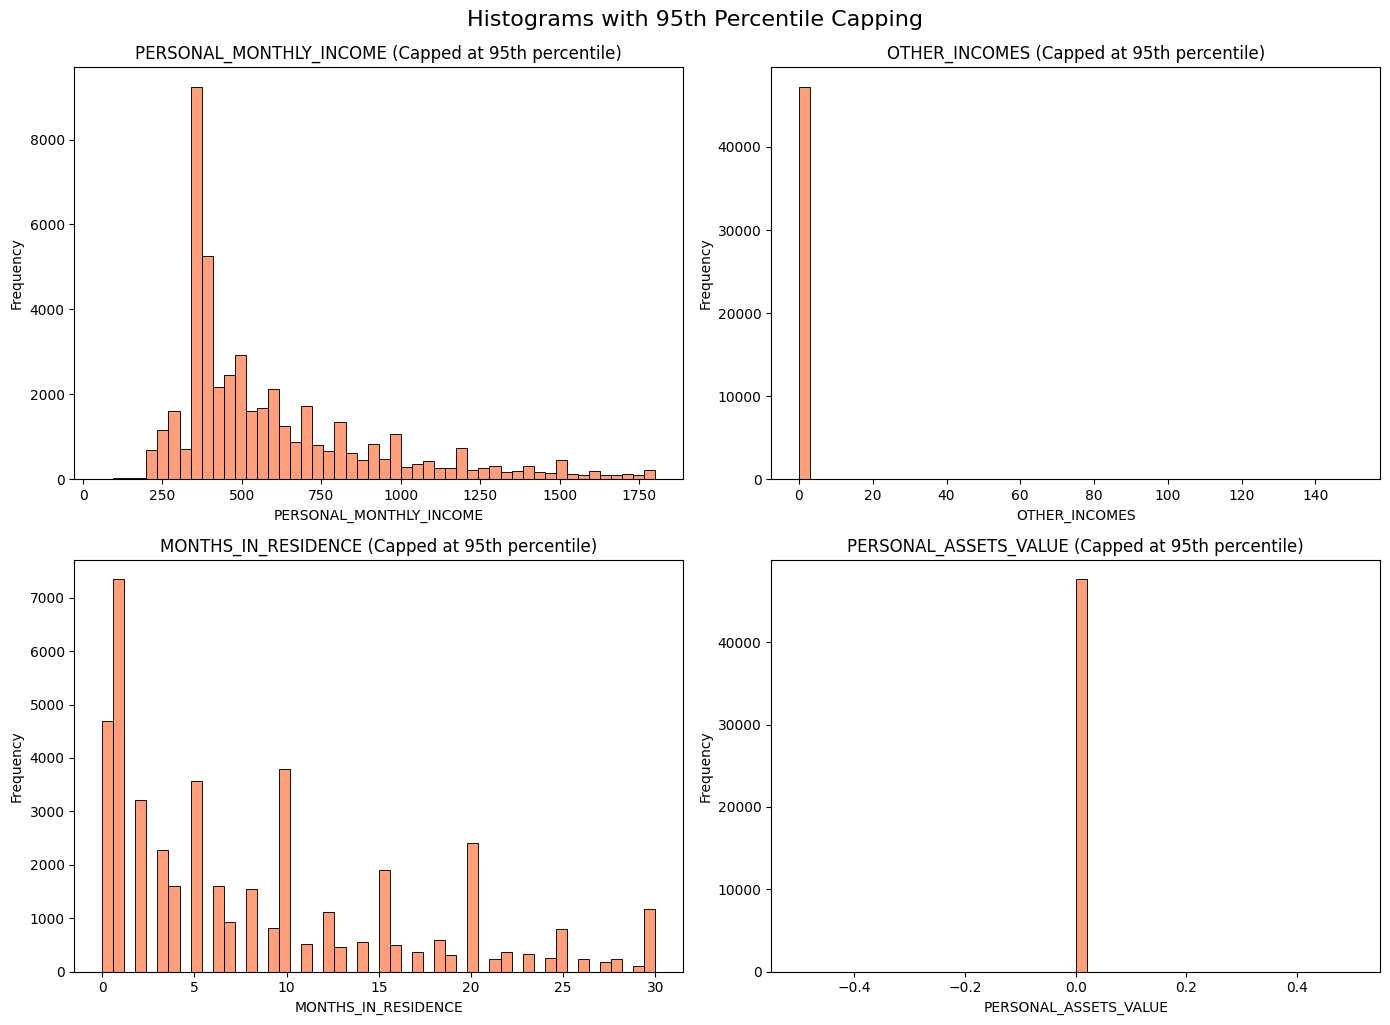

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

features = ['PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'MONTHS_IN_RESIDENCE', 'PERSONAL_ASSETS_VALUE','QUANT_DEPENDENTS']
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features):
    capped_val = numerical_df[feature].quantile(0.95)
    plt.subplot(2, 2, i + 1)
    sns.histplot(numerical_df[numerical_df[feature] <= capped_val][feature], bins=50, color='coral')
    plt.title(f'{feature} (Capped at 95th percentile)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle("Histograms with 95th Percentile Capping", fontsize=16, y=1.02)
plt.show()

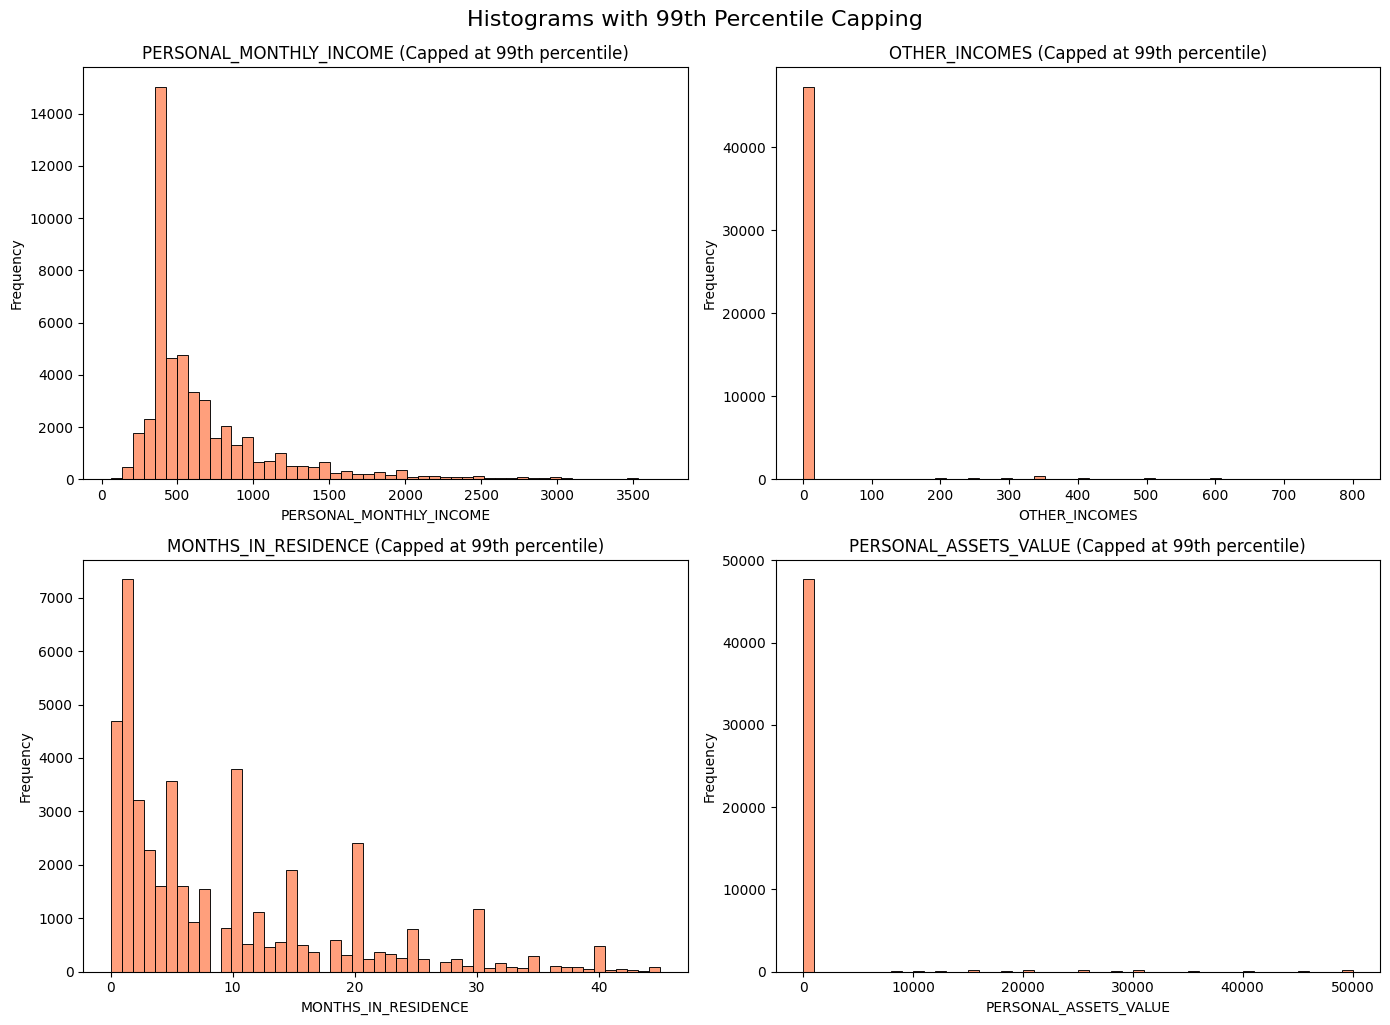

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

features = ['PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'MONTHS_IN_RESIDENCE', 'PERSONAL_ASSETS_VALUE']
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features):
    capped_val = numerical_df[feature].quantile(0.99)
    plt.subplot(2, 2, i + 1)
    sns.histplot(numerical_df[numerical_df[feature] <= capped_val][feature], bins=50, color='coral')
    plt.title(f'{feature} (Capped at 99th percentile)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle("Histograms with 99th Percentile Capping", fontsize=16, y=1.02)
plt.show()


**2. Barplot capped at 99% to visualize continuous features**

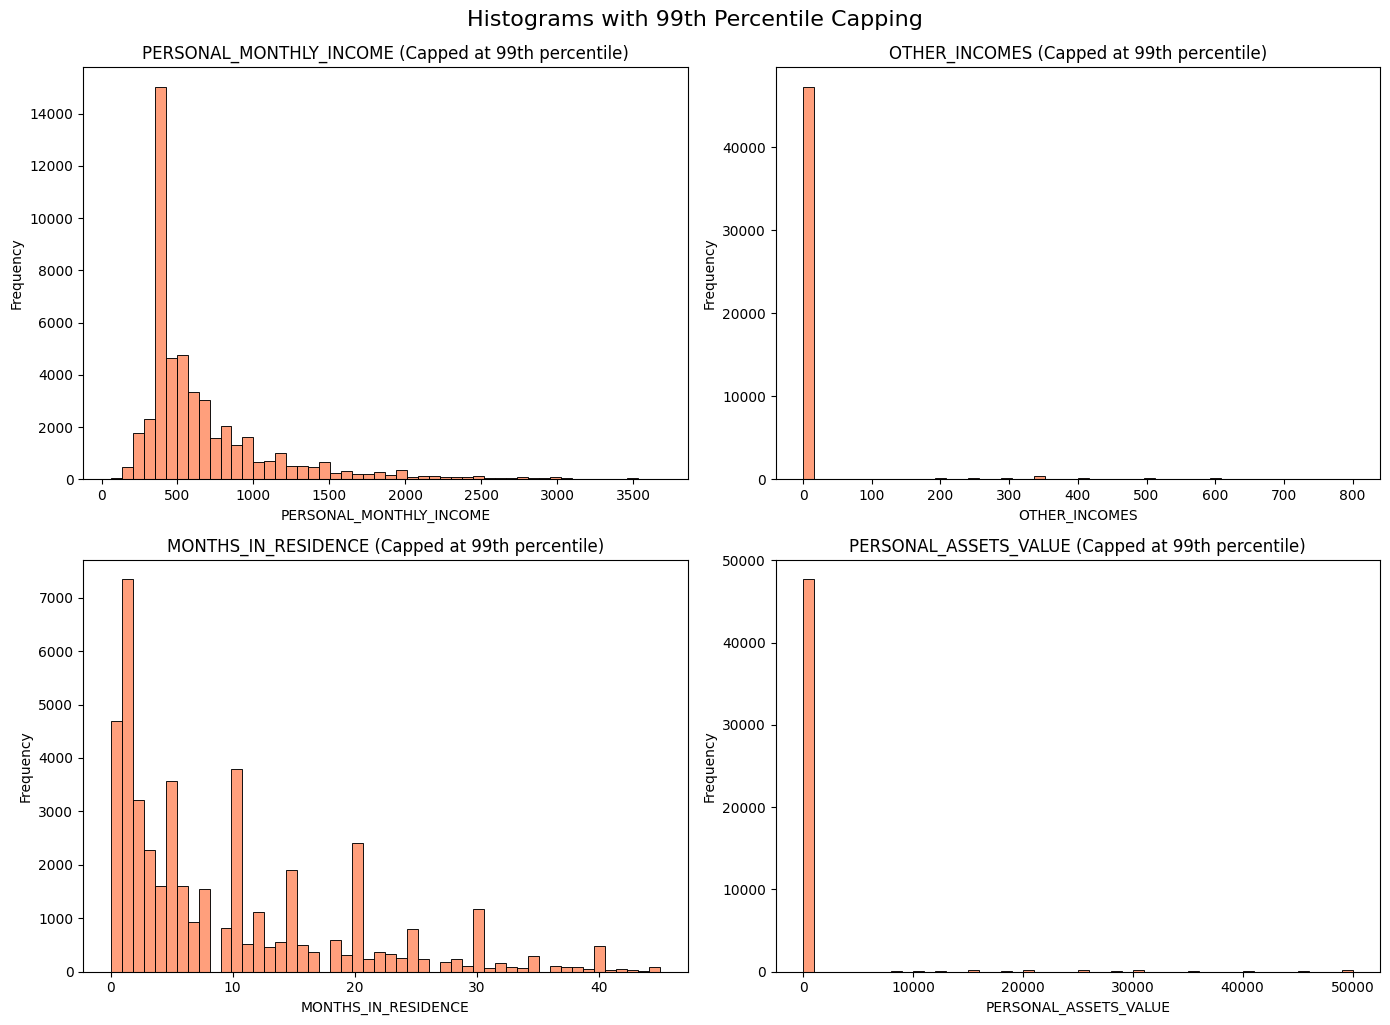

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

features = ['PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'MONTHS_IN_RESIDENCE', 'PERSONAL_ASSETS_VALUE']
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features):
    capped_val = numerical_df[feature].quantile(0.99)
    plt.subplot(2, 2, i + 1)
    sns.histplot(numerical_df[numerical_df[feature] <= capped_val][feature], bins=50, color='coral')
    plt.title(f'{feature} (Capped at 99th percentile)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle("Histograms with 99th Percentile Capping", fontsize=16, y=1.02)
plt.show()




> The barplots clearly show that two features-` PERSONAL_ASSETS_VALUE` and `OTHER_INCOMES` contain most values as zero and the rest are outliers- These columns could be thus dropped in future.


> The features-` MONTHS_IN_RESIDENCE` and `PERSONAL_MONTHLY_INCOME `are right skewed with `PERSONAL_MONTHLY_INCOME` having spike at 350 R$ with 13% of total values.





In [ ]:
6898/50000


0.13796

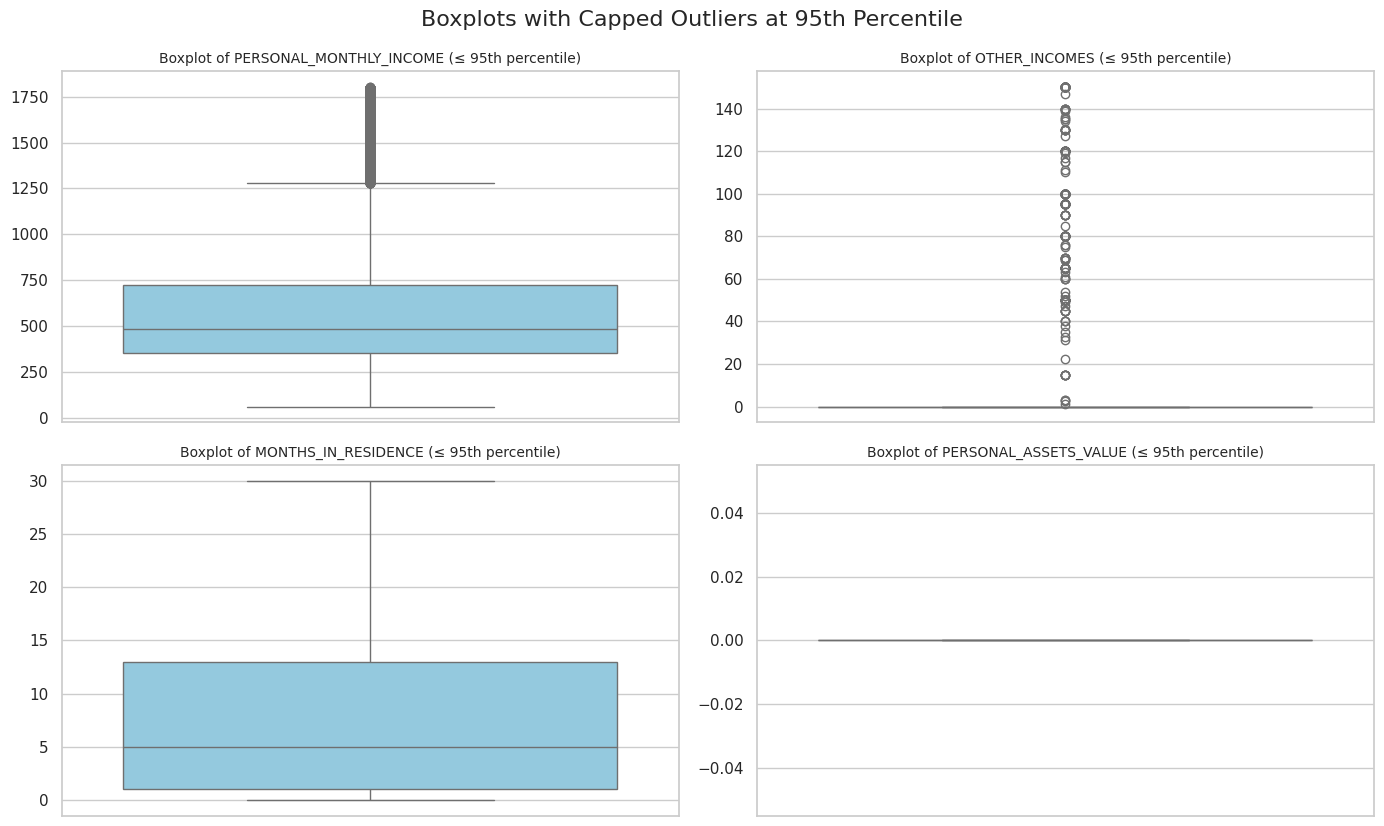

In [ ]:
# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Feature list from numerical_df
features = ['PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'MONTHS_IN_RESIDENCE', 'PERSONAL_ASSETS_VALUE']

# Create subplots
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)

    # Cap values at 95th percentile for better visualization
    capped_95 = numerical_df[feature].quantile(0.95)
    capped_data = numerical_df[numerical_df[feature] <= capped_95][feature]

    sns.boxplot(y=capped_data, color='skyblue')
    plt.title(f'Boxplot of {feature} (≤ 95th percentile)', fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.suptitle("Boxplots with Capped Outliers at 95th Percentile", fontsize=16, y=1.03)
plt.show()


**Skewness and Kurtosis**

In [ ]:
print(numerical_df['MONTHS_IN_RESIDENCE'].skew())
print(numerical_df['MONTHS_IN_RESIDENCE'].kurtosis())

1.9036703408954152
9.129723205274011




> Hence, MONTHS_IN_RESIDENCE is highly skewed and will require log transformation.



In [ ]:
print(numerical_df['PERSONAL_MONTHLY_INCOME'].skew())
print(numerical_df['PERSONAL_MONTHLY_INCOME'].kurtosis())
# These extreme values suggest heavy outliers in data

85.7057480035924
8975.879000318488


In [ ]:
# List of features to check
features = ['PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'MONTHS_IN_RESIDENCE', 'PERSONAL_ASSETS_VALUE']

# Dictionary to store outlier indexes for each feature
outliers_dict = {}

for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get outlier indices
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outliers_dict[feature] = outliers.index.tolist()

    print(f"Feature: {feature}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Number of Outliers: {len(outliers)}")
    print("-" * 50)


Feature: PERSONAL_MONTHLY_INCOME
IQR: 440.00
Lower Bound: -300.00, Upper Bound: 1460.00
Number of Outliers: 4136
--------------------------------------------------
Feature: OTHER_INCOMES
IQR: 0.00
Lower Bound: 0.00, Upper Bound: 0.00
Number of Outliers: 2773
--------------------------------------------------
Feature: MONTHS_IN_RESIDENCE
IQR: 14.00
Lower Bound: -20.00, Upper Bound: 36.00
Number of Outliers: 1344
--------------------------------------------------
Feature: PERSONAL_ASSETS_VALUE
IQR: 0.00
Lower Bound: 0.00, Upper Bound: 0.00
Number of Outliers: 2391
--------------------------------------------------


In [ ]:
47609/50000

0.95218

**Observations**

1. ` PERSONAL_ASSETS_VALUE and OTHER_INCOMES` - 95% values are zero and the rest are outliers- Wincorize or impute with zero.
2. `MONTHS_IN_RESIDENCE and PERSONAL_MONTHLY_INCOME` - Right skewed with few outliers that are meaningful so mostly will keep this feature untouched.


**`'AGE'`- 1. Z-score method**

In [ ]:
from scipy import stats
z_scores = stats.zscore(numerical_df['AGE'])

# Create a boolean mask for outliers
outlier_mask = abs(z_scores) > 3  # You can use 2.5 if you want to be more lenient

# Extract the outlier values
age_outliers_z = numerical_df['AGE'][outlier_mask]

# Display the outliers
print("Outliers in AGE:\n", age_outliers_z)


Outliers in AGE:
 104      92
133      91
256      91
1085     98
1150     97
         ..
44883    91
47355    90
47612    91
47791    94
48570    89
Name: AGE, Length: 82, dtype: int64


**`'AGE'`- 2. IQR Method**

In [ ]:
Q1 = numerical_df['AGE'].quantile(0.25)
Q3 = numerical_df['AGE'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outlier_mask = (numerical_df['AGE'] < lower_bound) | (numerical_df['AGE'] > upper_bound)
age_outliers_iqr = numerical_df['AGE'][iqr_outlier_mask]

print("Outliers in AGE using IQR method:")
print(age_outliers_iqr)
min(age_outliers_iqr)


Outliers in AGE using IQR method:
104      92
133      91
256      91
1085     98
1150     97
         ..
47370    87
47612    91
47791    94
48570    89
48725    87
Name: AGE, Length: 125, dtype: int64


87

In [ ]:
common_outliers = age_outliers_z[age_outliers_z.isin(age_outliers_iqr)]
print(common_outliers)

104      92
133      91
256      91
1085     98
1150     97
         ..
44883    91
47355    90
47612    91
47791    94
48570    89
Name: AGE, Length: 82, dtype: int64


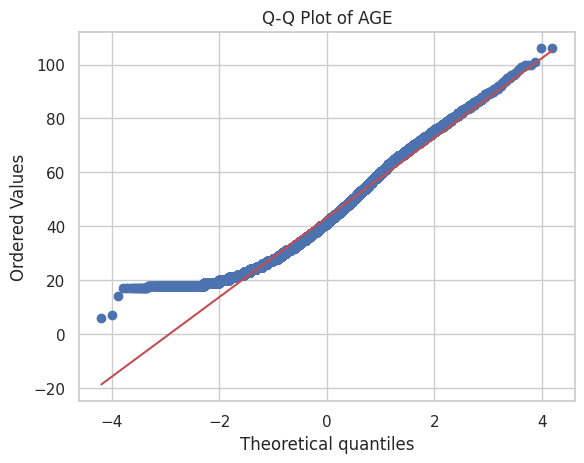

In [ ]:
stats.probplot(numerical_df['AGE'], dist="norm", plot=plt)
plt.title('Q-Q Plot of AGE')
plt.show()



> Hence, `AGE` follows normal distribution and thus z-score would be more appropriate for outlier detection.
However, age above 90 is anyways rare and not necessarily an outlier.


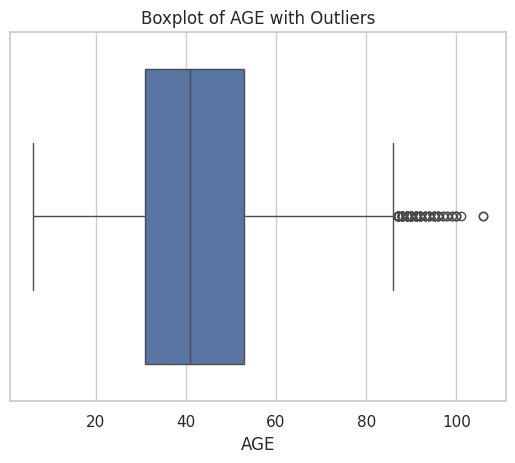

In [ ]:
import seaborn as sns

sns.boxplot(data=numerical_df, x='AGE')
plt.title("Boxplot of AGE with Outliers")
plt.show()


In [ ]:
def show_value_counts(df):
    for col in df.columns:
        print(f"\n--- Value Counts for: {col} ---")
        print(df[col].value_counts(dropna=False))
show_value_counts(numerical_df)


--- Value Counts for: PAYMENT_DAY ---
PAYMENT_DAY
10    20422
15     8750
5      7347
25     7026
20     4694
1      1761
Name: count, dtype: int64

--- Value Counts for: POSTAL_ADDRESS_TYPE ---
POSTAL_ADDRESS_TYPE
1    49673
2      327
Name: count, dtype: int64

--- Value Counts for: MARITAL_STATUS ---
MARITAL_STATUS
2    25967
1    15286
4     4206
6     1877
5     1296
3      632
7      534
0      202
Name: count, dtype: int64

--- Value Counts for: QUANT_DEPENDANTS ---
QUANT_DEPENDANTS
0     33655
1      7004
2      5363
3      2465
4       860
5       365
6       139
7        65
8        35
9        14
10       13
11        7
12        6
13        4
14        3
15        1
53        1
Name: count, dtype: int64

--- Value Counts for: NACIONALITY ---
NACIONALITY
1    47884
0     2018
2       98
Name: count, dtype: int64

--- Value Counts for: RESIDENCE_TYPE ---
RESIDENCE_TYPE
1.0    41572
2.0     3884
5.0     1983
NaN     1349
0.0      760
4.0      311
3.0      141
Name: count, dty

## 2. Exploring the categorical df

In [ ]:
categorical_df.shape

(50000, 15)

In [ ]:
categorical_df.isnull().sum()

,0
APPLICATION_SUBMISSION_TYPE,0
SEX,0
STATE_OF_BIRTH,0
CITY_OF_BIRTH,0
RESIDENCIAL_STATE,0
RESIDENCIAL_CITY,0
RESIDENCIAL_BOROUGH,0
FLAG_RESIDENCIAL_PHONE,0
RESIDENCIAL_PHONE_AREA_CODE,0
COMPANY,0




> No null values in `categorical_df` but there could be UNKNOWN values



###  Cramer's V Heatmap to quantify correlation between categorical variables

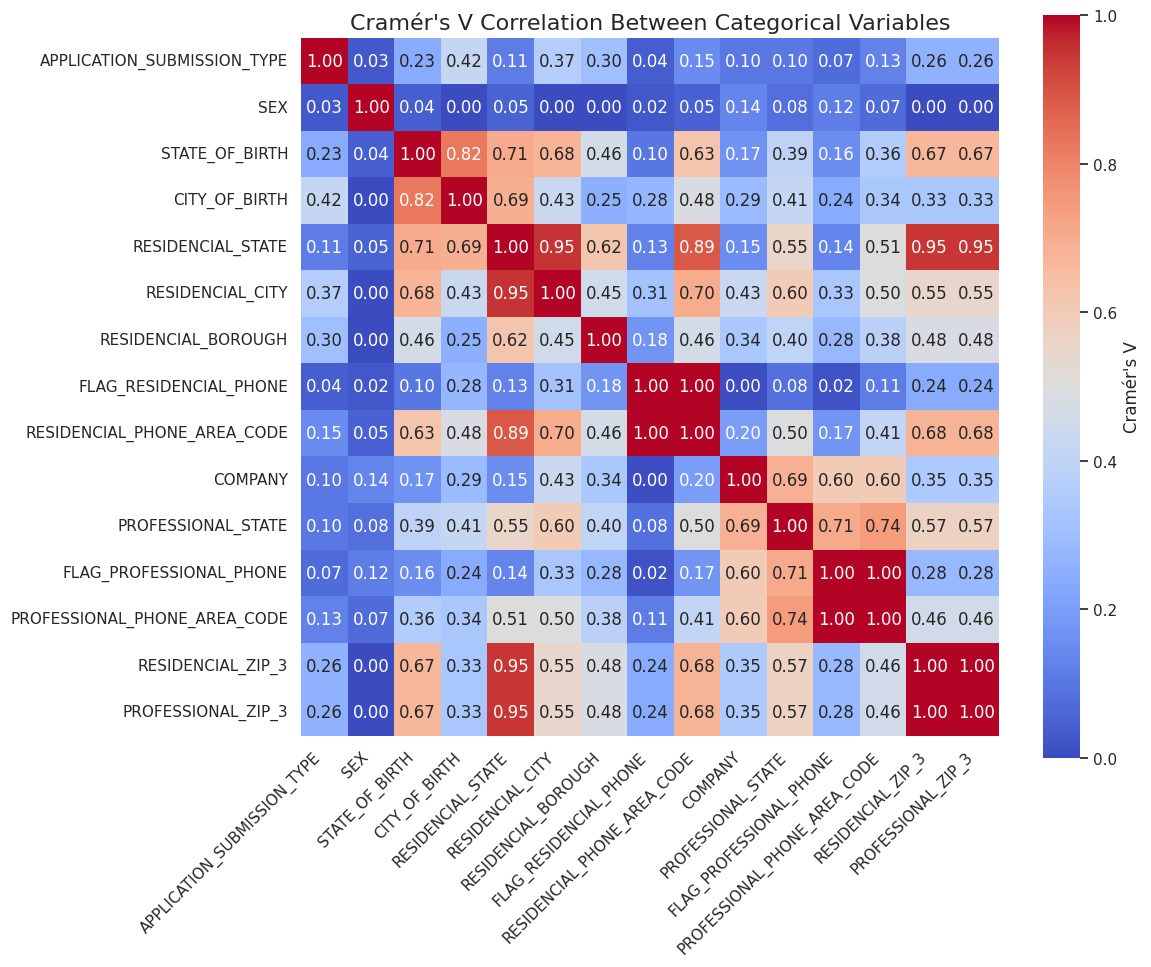

In [ ]:

import pandas as pd
import numpy as np
import scipy.stats as stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = categorical_df.columns
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_results.loc[col1, col2] = cramers_v(categorical_df[col1], categorical_df[col2])

cramers_results = cramers_results.astype(float)

plt.figure(figsize=(12, 10))
sns.heatmap(cramers_results, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={'label': "Cramér's V"})
plt.title("Cramér's V Correlation Between Categorical Variables", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Result insights from Cramer's V test**

1. **Perfect association (1.00)**-
`FLAG_PROFESSIONAL_PHONE` and `PROFESSIONAL_PHONE_AREA_CODE`. One needs to be dropped.
2. **Perfect association (1.00)**- `RESIDENTIAL_ZIP_3` and `PROFESSIONAL_ZIP_3`
3. **High association (0.95-0.89)**-` RESIDENCIAL_STATE, RESIDENCIAL_CITY,RESIDENCIAL_PHONE_AREA_CODE, RESIDENCIAL_ZIP_3`

### Finding the distribution among unique categories in each feature

In [ ]:
for col in categorical_df.columns:
    print(f"\n--- {col} ---")
    print(categorical_df[col].value_counts(dropna=False))



--- APPLICATION_SUBMISSION_TYPE ---
APPLICATION_SUBMISSION_TYPE
Web      28206
0        19461
Carga     2333
Name: count, dtype: int64

--- SEX ---
SEX
F    30805
M    19130
N       48
        17
Name: count, dtype: int64

--- STATE_OF_BIRTH ---
STATE_OF_BIRTH
BA    5717
SP    5695
RS    5017
CE    4786
PE    4098
MG    3776
      2064
RN    2008
PR    1971
RJ    1826
PA    1692
AL    1645
PB    1609
MA    1416
GO    1143
MT     849
SC     707
PI     675
ES     638
MS     496
AC     474
SE     356
AM     354
DF     310
TO     244
AP     236
RO     155
RR      42
XX       1
Name: count, dtype: int64

--- CITY_OF_BIRTH ---
CITY_OF_BIRTH
                   2064
RIO DE JANEIRO     1184
RECIFE              781
SAO PAULO           781
FORTALEZA           765
                   ... 
SERQUEIRA CEZAR       1
ARCEBURGO             1
SCO GABRIEL           1
SANTA HELENAMA        1
Nazare Da Mata        1
Name: count, Length: 9910, dtype: int64

--- RESIDENCIAL_STATE ---
RESIDENCIAL_STATE
SP    8



> There are many missing values in different forms in each feature, also some random values.



**Observations- missing values**

1. ` APPLICATION_SUBMISSION_TYPE` - 40% values are unknown(0)
2. `SEX `- 65 values are missing 'N' or Unknown
3. `STATE_OF_BIRTH `& `CITY_OF_BIRTH`- 4% values missing
4. `RESIDENCIAL_STATE` & `RESIDENCIAL_CITY`- No values missing
5. `RESIDENCIAL_PHONE_AREA_CODE`- 16% values missing
6. `PROFESSIONAL_PHONE_AREA_CODE`- 73% values missing-likely to be dropped
7. `PROFESSIONAL_STATE`- 68% values missing- likely to be dropped

**Observations**
1. Some numerical variables are classified as categorical because of one or more random values like-` PROFESSIONAL_ZIP_3, RESIDENCIAL_ZIP_3, PROFESSIONAL_PHONE_AREA_CODE, RESIDENCIAL_PHONE_AREA_CODE`. These can be converted back to numerical variables.
2. There are no categorical features that are highly concentrated in few top categories. Most of them are uniformly distributed (Can't combine rare categories as 'Others' if frequency.)

However, similar categories can be grouped together using target encoding and then clustering. OR Grouping categories with similar behaviour with target.

### Checking correlation of categorical columns with target variable

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

# Cramér’s V computation function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Filter categorical columns only (exclude numeric types)
categorical_cols = df.select_dtypes(include=['object', 'category'], exclude=['number']).columns.tolist()

# Compute Cramér’s V against the target
cramers_v_scores = {}

for col in categorical_cols:
    if df[col].nunique() > 1:
        try:
            v = cramers_v(df[col].astype(str), df['TARGET'])
            cramers_v_scores[col] = v
        except:
            continue

# Create and display sorted DataFrame
cramers_v_df = pd.DataFrame.from_dict(cramers_v_scores, orient='index', columns=['Cramers_V'])
cramers_v_df = cramers_v_df.sort_values(by='Cramers_V', ascending=False)

print(cramers_v_df)


### Cardinality Check

In [ ]:
categorical_df.nunique().sort_values(ascending=False)


,0
RESIDENCIAL_BOROUGH,14511
CITY_OF_BIRTH,9910
RESIDENCIAL_CITY,3529
PROFESSIONAL_ZIP_3,1481
RESIDENCIAL_ZIP_3,1481
RESIDENCIAL_PHONE_AREA_CODE,102
PROFESSIONAL_PHONE_AREA_CODE,87
STATE_OF_BIRTH,29
PROFESSIONAL_STATE,28
RESIDENCIAL_STATE,27





> Need to combine rare categories into Others to reduce cardinality. ALso, there is need to identify and remove redundant features who deliver the same informations. We will keep only one location column per type - Residencial/Professional



In [ ]:
from scipy.stats import chi2_contingency

for col in categorical_df.columns:
    contingency_table = pd.crosstab(categorical_df[col], numerical_df['TARGET_LABEL_BAD'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"{col}: p-value = {p:.4f}")


APPLICATION_SUBMISSION_TYPE: p-value = 0.0000
SEX: p-value = 0.0000
STATE_OF_BIRTH: p-value = 0.0000
CITY_OF_BIRTH: p-value = 0.0248
RESIDENCIAL_STATE: p-value = 0.0000
RESIDENCIAL_CITY: p-value = 0.0000
RESIDENCIAL_BOROUGH: p-value = 0.0000
FLAG_RESIDENCIAL_PHONE: p-value = 0.0000
RESIDENCIAL_PHONE_AREA_CODE: p-value = 0.0000
COMPANY: p-value = 0.0655
PROFESSIONAL_STATE: p-value = 0.0000
FLAG_PROFESSIONAL_PHONE: p-value = 0.0004
PROFESSIONAL_PHONE_AREA_CODE: p-value = 0.0000
RESIDENCIAL_ZIP_3: p-value = 0.0000
PROFESSIONAL_ZIP_3: p-value = 0.0000



> Low p-value indicates significant relationship of features with target feature



## Univariate Analysis

### 1. 100% Stacked bar charts for identifying the distribution of target label v/s discrete features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of features to plot against the target
features_to_plot = ['QUANT_CARS', 'PROFESSION_CODE', 'SEX', 'RESIDENCE_TYPE', 'OCCUPATION_TYPE']

# Iterate through each feature and create a stacked bar chart
for feature in features_to_plot:
    # Create a crosstab of the feature and the target
    crosstab_result = pd.crosstab(df2[feature], df2['TARGET_LABEL_BAD'])

    # Calculate the proportion within each category of the feature
    crosstab_proportion = crosstab_result.div(crosstab_result.sum(axis=1), axis=0)

    # Plot the 100% stacked bar chart
    ax = crosstab_proportion.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Add title and labels
    plt.title(f'Distribution of TARGET_LABEL_BAD by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.legend(title='TARGET_LABEL_BAD', labels=['Good (0)', 'Bad (1)']) # Customize legend labels
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

In [ ]:

age_bins = [18, 25, 35, 50, 65, numerical_df['AGE'].max()]
age_labels = ['18-25', '26-35', '36-50', '51-65', '65+']

# Create a new column 'AGE_BIN' with the binned values on a copy of the data
temp_df = numerical_df.copy()
temp_df['AGE_BIN'] = pd.cut(temp_df['AGE'], bins=age_bins, labels=age_labels, right=False)

# Create a crosstab of the age bins and the target using the temporary DataFrame
crosstab_age_bin = pd.crosstab(temp_df['AGE_BIN'], temp_df['TARGET_LABEL_BAD'])

# Calculate the proportion within each age bin
crosstab_proportion_age_bin = crosstab_age_bin.div(crosstab_age_bin.sum(axis=1), axis=0)

# Plot the 100% stacked bar chart
ax = crosstab_proportion_age_bin.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add title and labels
plt.title('Distribution of TARGET_LABEL_BAD by Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend(title='TARGET_LABEL_BAD', labels=['Good (0)', 'Bad (1)']) # Customize legend labels
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

**Observations**

1. The number of cars a person owns **doesn't affect** his credit capacity as per the dataset.
2. Encoding is not given for occupation type. For each occupation type, **20-30% of target labels are bad**. With type-4.0 having highest(30%) labels as bad, suggesting it is some lower paying occupation.
3. Residence type encoding is also not given but lower bad rates like **type-3.0** suggests it is an **owned residence** and higher bad rates like **type-2.0** suggest **mortgaged or rented residence**.
4. Male and Females have** comaprable **bad rates
5. Profession code encoding not given. Professions** 5 and 18**- **have no bad rates **suggested a high-paying or stable profession whereas** Profession 14- **with almost **50% default rates** suggest low paying one. Profession codes can be numbered as per their % bad rates.
6. As expected, the deafult rates are **higher** in lower age groups

## Bivariate/ Multivariate Analysis

### 1. `PERSONAL_MONTHLY_INCOME `v/s `MONTHS_IN_RESIDENCE `w.r.t Target

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=numerical_df, x='PERSONAL_MONTHLY_INCOME', y='MONTHS_IN_RESIDENCE', hue='TARGET_LABEL_BAD', alpha=0.5)
plt.title('Scatter Plot of Income vs. Residence by Target')
plt.show()

**Scatter plot after capping the outliers**

In [ ]:

# Calculate the 95th percentile for each feature
income_cap = numerical_df['PERSONAL_MONTHLY_INCOME'].quantile(0.99)
residence_cap = numerical_df['MONTHS_IN_RESIDENCE'].quantile(0.99)

# Create a temporary DataFrame with capped values for plotting
# Ensure the 'TARGET_LABEL_BAD' column is included for hue
plot_data = numerical_df.copy()
plot_data['PERSONAL_MONTHLY_INCOME_Capped'] = plot_data['PERSONAL_MONTHLY_INCOME'].clip(upper=income_cap)
plot_data['MONTHS_IN_RESIDENCE_Capped'] = plot_data['MONTHS_IN_RESIDENCE'].clip(upper=residence_cap)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_data, x='PERSONAL_MONTHLY_INCOME_Capped', y='MONTHS_IN_RESIDENCE_Capped', hue='TARGET_LABEL_BAD', alpha=0.5)
plt.title('Scatter Plot of Income vs. Residence by Target (Outliers Capped at 95%)')
plt.xlabel('PERSONAL_MONTHLY_INCOME (Capped at 95th percentile)')
plt.ylabel('MONTHS_IN_RESIDENCE (Capped at 95th percentile)')
plt.show()



> Hence, there is no clear trend between income of a person and months od his residence.



### 2. `PROFESSION_CODE v/s PERSONAL_MONTHLY_INCOME` w.r.t Target



In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=numerical_df, x='PROFESSION_CODE', y='PERSONAL_MONTHLY_INCOME', hue='TARGET_LABEL_BAD', alpha=0.5)
plt.title('Scatter Plot of Income vs. Residence by Target')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the data based on the target label
df_good = numerical_df[numerical_df['TARGET_LABEL_BAD'] == 0].copy()
df_bad = numerical_df[numerical_df['TARGET_LABEL_BAD'] == 1].copy()

# Calculate the 95th percentile for PERSONAL_MONTHLY_INCOME
# You can calculate this on the full dataset or within each subset
income_cap = numerical_df['PERSONAL_MONTHLY_INCOME'].quantile(0.95)

# Cap the income values in both dataframes for consistent plotting
df_good['PERSONAL_MONTHLY_INCOME_Capped'] = df_good['PERSONAL_MONTHLY_INCOME'].clip(upper=income_cap)
df_bad['PERSONAL_MONTHLY_INCOME_Capped'] = df_bad['PERSONAL_MONTHLY_INCOME'].clip(upper=income_cap)


# Plot for TARGET_LABEL_BAD == 0 (Good)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_good, x='PROFESSION_CODE', y='PERSONAL_MONTHLY_INCOME_Capped', alpha=0.5, color='skyblue')
plt.title('Scatter Plot of Profession Code vs. Income (Target Label = 0 - Good)')
plt.xlabel('PROFESSION_CODE')
plt.ylabel('PERSONAL_MONTHLY_INCOME (Capped at 95th percentile)')
plt.show()

# Plot for TARGET_LABEL_BAD == 1 (Bad)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_bad, x='PROFESSION_CODE', y='PERSONAL_MONTHLY_INCOME_Capped', alpha=0.5, color='lightcoral')
plt.title('Scatter Plot of Profession Code vs. Income (Target Label = 1 - Bad)')
plt.xlabel('PROFESSION_CODE')
plt.ylabel('PERSONAL_MONTHLY_INCOME (Capped at 95th percentile)')
plt.show()



> The scatter plots of 0 and 1 label follow the same distribution of income v/s profession. This suggests that we cannot generalise income or more deafult rates based on profession code itself.



### 3. Pairplot of few features

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Copy the original DataFrame to avoid altering it directly
df_capped = numerical_df.copy()

# Step 2: Cap PERSONAL_MONTHLY_INCOME at the 99th percentile
income_cap = df_capped['PERSONAL_MONTHLY_INCOME'].quantile(0.99)
df_capped['PERSONAL_MONTHLY_INCOME'] = df_capped['PERSONAL_MONTHLY_INCOME'].clip(upper=income_cap)

# Step 3: Select numerical features to include in the pair plot
selected_numerical_features = [
    'AGE',
    'PERSONAL_MONTHLY_INCOME',
    'QUANT_CARS',
    'QUANT_BANKING_ACCOUNTS',
    'TARGET_LABEL_BAD'  # Include the target for coloring
]

# Step 4: Create the pair plot
sns.pairplot(df_capped[selected_numerical_features], hue='TARGET_LABEL_BAD', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Numerical Features (Income Capped at 99th Percentile)', y=1.02)
plt.tight_layout()
plt.show()


**Observations**

1. Risk is higher (label 1) among younger, lower-income individuals with fewer financial assets (cars, accounts).

2. Assets and financial maturity (as proxied by age and income) seem to associate with lower risk (label 0).